In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy

In [3]:
from sklearn.model_selection import StratifiedKFold
from scipy import interp
import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [4]:
dataset = pd.read_csv(r'D:\test\data.csv',index_col=0,encoding="ISO-8859-1")
y = dataset['Relapse']
X = dataset.drop(['Relapse'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [5]:
from imblearn.over_sampling import SMOTE
X_resample_train, y_resample_train = SMOTE().fit_resample(X_train, y_train)
print ('The number of transactions after resampling : ' + str(len(X_resample_train)))
print ('Is the number of fraudulent transaction is equal to the number of normal tansactions? ' + str(sum(y_resample_train == 0) == sum(y_resample_train == 1)))

The number of transactions after resampling : 1038
Is the number of fraudulent transaction is equal to the number of normal tansactions? True


In [6]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_resample_train)
X_resample_train = scaler.transform(X_resample_train)  
X_test = scaler.transform(X_test) 

In [7]:
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# LR

In [8]:
from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
lr = LogisticRegression(C=10,
                   class_weight=None,
                   dual=False, 
                   fit_intercept=True,
                   intercept_scaling=1, 
                   max_iter=100, 
                   multi_class='ovr',
                   n_jobs=1,
                   penalty='l2',
                   random_state=None, 
                   solver='saga',
                   tol=0.01,
                   verbose=0, 
                   warm_start=False)

In [9]:
print(X_resample_train.shape)
print(y_resample_train.shape)
print(X_train.shape)
print(y_train.shape)

(1038, 35)
(1038,)
(625, 35)
(625,)


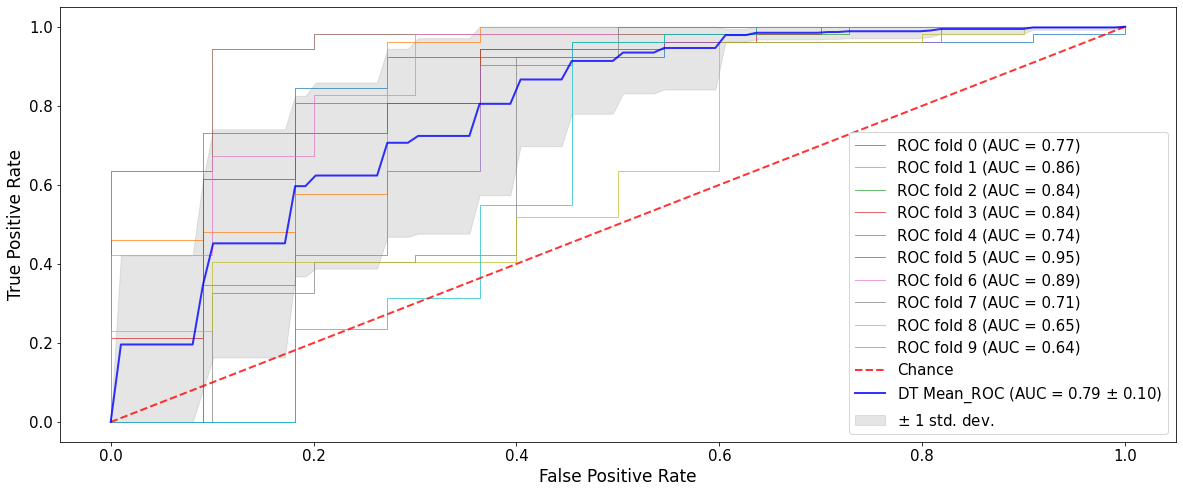

In [69]:
cv = StratifiedKFold(n_splits=10)
plt.figure(figsize=(20,8))

tprs7 = []
aucs7 = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
X = X_train
y = y_train
for train, test in cv.split(X, y):
    probas_ = lr.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs7.append(interp(mean_fpr, fpr, tpr))
    tprs7[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs7.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.7,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr7 = np.mean(tprs7, axis=0)
mean_tpr7[-1] = 1.0
mean_auc7 = auc(mean_fpr, mean_tpr7)
std_auc7 = np.std(aucs7)
plt.plot(mean_fpr, mean_tpr7, color='b',
         label=r'DT Mean_ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc7, std_auc7),
         lw=2, alpha=.8)

std_tpr7 = np.std(tprs7, axis=0)
tprs7_upper = np.minimum(mean_tpr7 + std_tpr7, 1)
tprs7_lower = np.maximum(mean_tpr7 - std_tpr7, 0)
plt.fill_between(mean_fpr, tprs7_lower, tprs7_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.legend(loc="lower right", fontsize=15)
plt.savefig('DT Mean_ROC.png',dpi=600,bbox_inches="tight")
plt.show()

0.7674825174825175
0.8601398601398601
0.8409090909090908
0.8409090909090908
0.7395104895104895
0.948076923076923
0.8865384615384615
0.7076923076923076
0.6519230769230769
0.6381461675579323


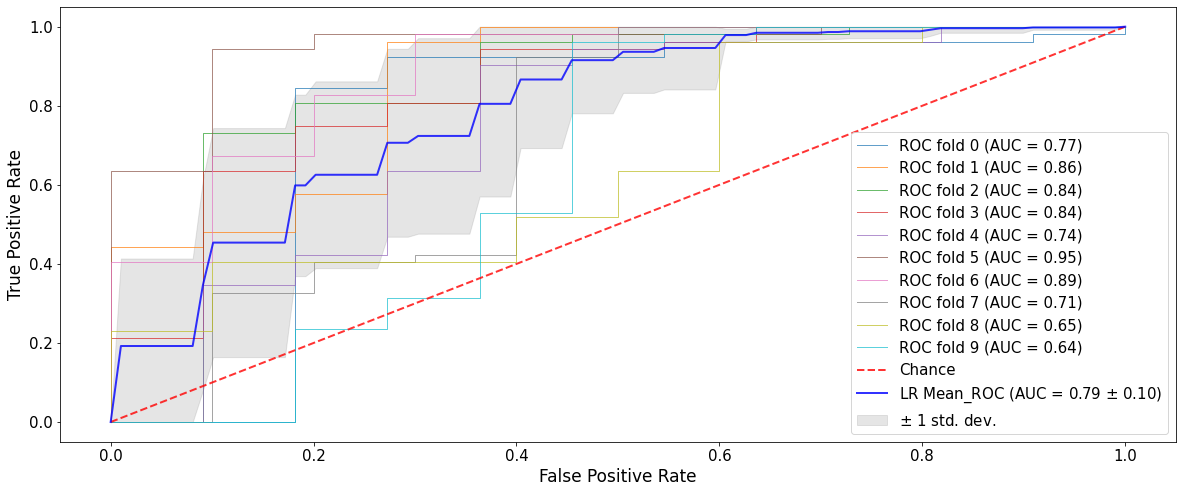

In [10]:
cv = StratifiedKFold(n_splits=10)
plt.figure(figsize=(20,8))

tprs1 = []
aucs1 = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
X = X_resample_train
y = y_resample_train
# print(X)
# print(y)
for train, test in cv.split(X, y):
#     print(train)
#     print(test)
# clf.fit(X_train.iloc[train_index,:], Y_train.iloc[train_index,:])
    probas_ = lr.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
#     probas_ = lr.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs1.append(interp(mean_fpr, fpr, tpr))
    tprs1[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs1.append(roc_auc)
    print(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.7,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr1 = np.mean(tprs1, axis=0)
mean_tpr1[-1] = 1.0
mean_auc1 = auc(mean_fpr, mean_tpr1)
std_auc1 = np.std(aucs1)
plt.plot(mean_fpr, mean_tpr1, color='b',
         label=r'LR Mean_ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc1, std_auc1),
         lw=2, alpha=.8)

std_tpr1 = np.std(tprs1, axis=0)
tprs1_upper = np.minimum(mean_tpr1 + std_tpr1, 1)
tprs1_lower = np.maximum(mean_tpr1 - std_tpr1, 0)
plt.fill_between(mean_fpr, tprs1_lower, tprs1_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.legend(loc="lower right", fontsize=15)
plt.savefig('LR Mean_ROC.png',dpi=600,bbox_inches="tight")
plt.show()

# SVM

In [83]:
from sklearn import svm 
svc_classifier = SVC(kernel = 'linear',C = 10, shrinking = True, probability=True)

0.5961538461538461
0.6328671328671329
0.6241258741258742
0.7377622377622378
0.7027972027972027
0.6576923076923077
0.698076923076923
0.5653846153846154
0.5326923076923078
0.5436720142602496


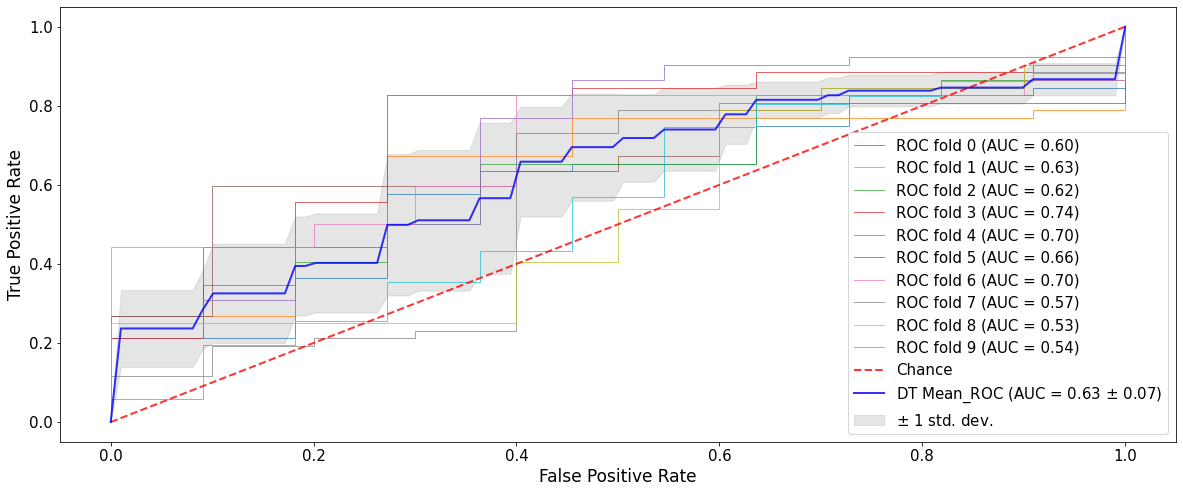

In [86]:
cv = StratifiedKFold(n_splits=10)
plt.figure(figsize=(20,8))

tprs2 = []
aucs2 = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
X = X_resample_train
y = y_resample_train
for train, test in cv.split(X, y):
    probas_ = svc_classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs2.append(interp(mean_fpr, fpr, tpr))
    tprs2[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs2.append(roc_auc)
    print(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.7,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr2 = np.mean(tprs2, axis=0)
mean_tpr2[-1] = 1.0
mean_auc2 = auc(mean_fpr, mean_tpr2)
std_auc2 = np.std(aucs2)
plt.plot(mean_fpr, mean_tpr2, color='b',
         label=r'DT Mean_ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc2, std_auc2),
         lw=2, alpha=.8)

std_tpr2 = np.std(tprs2, axis=0)
tprs2_upper = np.minimum(mean_tpr2 + std_tpr2, 1)
tprs2_lower = np.maximum(mean_tpr2 - std_tpr2, 0)
plt.fill_between(mean_fpr, tprs2_lower, tprs2_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.legend(loc="lower right", fontsize=15)
plt.savefig('SVM Mean_ROC.png',dpi=600,bbox_inches="tight")
plt.show()

# DT

In [16]:
dt_classifier = DecisionTreeClassifier(max_features = 30, random_state = 0,
                                           criterion="gini",
                                         splitter="random",
                                         max_depth=None,
                                         min_samples_split=0.1,
                                         min_samples_leaf=5,
                                         min_impurity_decrease=0.01,
                                         min_weight_fraction_leaf=0.02 )

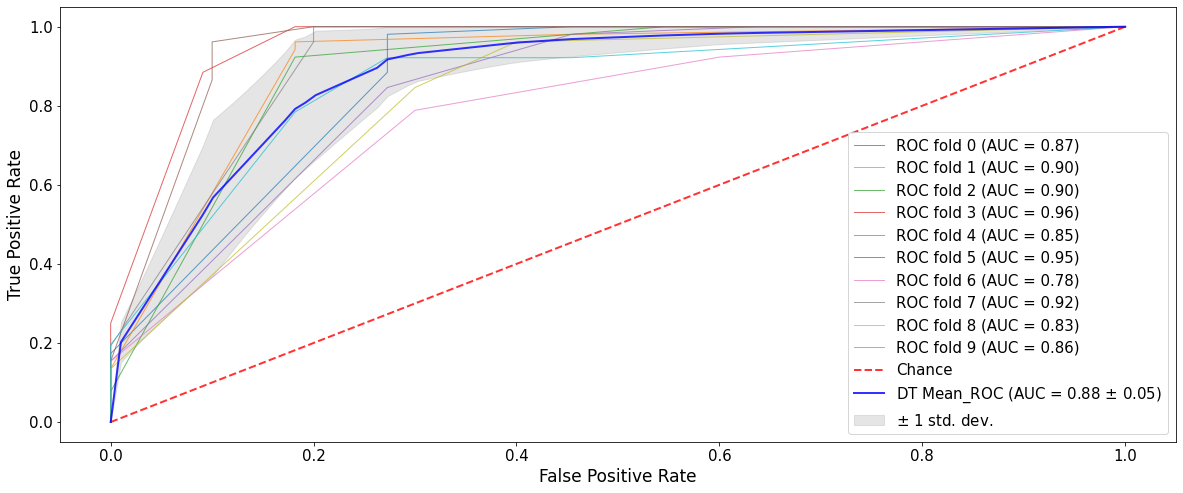

In [19]:
cv = StratifiedKFold(n_splits=10)
plt.figure(figsize=(20,8))

tprs3 = []
aucs3 = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
X = X_resample_train
y = y_resample_train
for train, test in cv.split(X, y):
    probas_ = dt_classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs3.append(interp(mean_fpr, fpr, tpr))
    tprs3[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs3.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.7,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr3 = np.mean(tprs3, axis=0)
mean_tpr3[-1] = 1.0
mean_auc3 = auc(mean_fpr, mean_tpr3)
std_auc3 = np.std(aucs3)
plt.plot(mean_fpr, mean_tpr3, color='b',
         label=r'DT Mean_ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc3, std_auc3),
         lw=2, alpha=.8)

std_tpr3 = np.std(tprs3, axis=0)
tprs3_upper = np.minimum(mean_tpr3 + std_tpr3, 1)
tprs3_lower = np.maximum(mean_tpr3 - std_tpr3, 0)
plt.fill_between(mean_fpr, tprs3_lower, tprs3_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.legend(loc="lower right", fontsize=15)
plt.savefig('DT Mean_ROC.png',dpi=600,bbox_inches="tight")
plt.show()

# RF

In [20]:
 rf_classifier = RandomForestClassifier(n_estimators = 100, max_features = 5,
                                        criterion = 'gini' random_state =0)


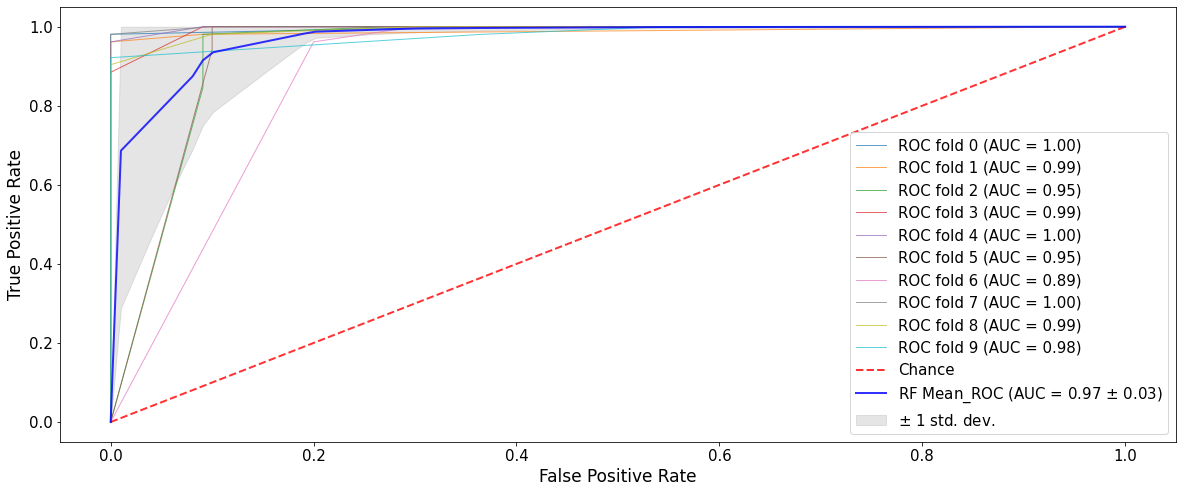

In [22]:
cv = StratifiedKFold(n_splits=10)
plt.figure(figsize=(20,8))

tprs4 = []
aucs4 = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
X = X_resample_train
y = y_resample_train
for train, test in cv.split(X, y):
    probas_ = rf_classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs4.append(interp(mean_fpr, fpr, tpr))
    tprs4[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs4.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.7,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr4 = np.mean(tprs4, axis=0)
mean_tpr4[-1] = 1.0
mean_auc4 = auc(mean_fpr, mean_tpr4)
std_auc4 = np.std(aucs4)
plt.plot(mean_fpr, mean_tpr4, color='b',
         label=r'RF Mean_ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc4, std_auc4),
         lw=2, alpha=.8)

std_tpr4 = np.std(tprs4, axis=0)
tprs4_upper = np.minimum(mean_tpr4 + std_tpr4, 1)
tprs4_lower = np.maximum(mean_tpr4 - std_tpr4, 0)
plt.fill_between(mean_fpr, tprs4_lower, tprs4_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.legend(loc="lower right", fontsize=15)
plt.savefig('RF Mean_ROC.png',dpi=600,bbox_inches="tight")
plt.show()

# ANN

Epoch 1/6
33/33 [==============================] - 2s 3ms/step - loss: 0.7398 - accuracy: 0.3988
Epoch 2/6
33/33 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.5000
Epoch 3/6
33/33 [==============================] - 0s 3ms/step - loss: 0.6100 - accuracy: 0.6224
Epoch 4/6
33/33 [==============================] - 0s 3ms/step - loss: 0.5769 - accuracy: 0.7071
Epoch 5/6
33/33 [==============================] - 0s 3ms/step - loss: 0.5518 - accuracy: 0.7784
Epoch 6/6
4/4 [==============================] - 0s 3ms/step
Epoch 1/6
33/33 [==============================] - 1s 2ms/step - loss: 0.8228 - accuracy: 0.4778
Epoch 2/6
33/33 [==============================] - 0s 2ms/step - loss: 0.7579 - accuracy: 0.5501
Epoch 3/6
33/33 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.6252
Epoch 4/6
33/33 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.6705
Epoch 5/6
33/33 [==============================] - 0s 3ms/step - l

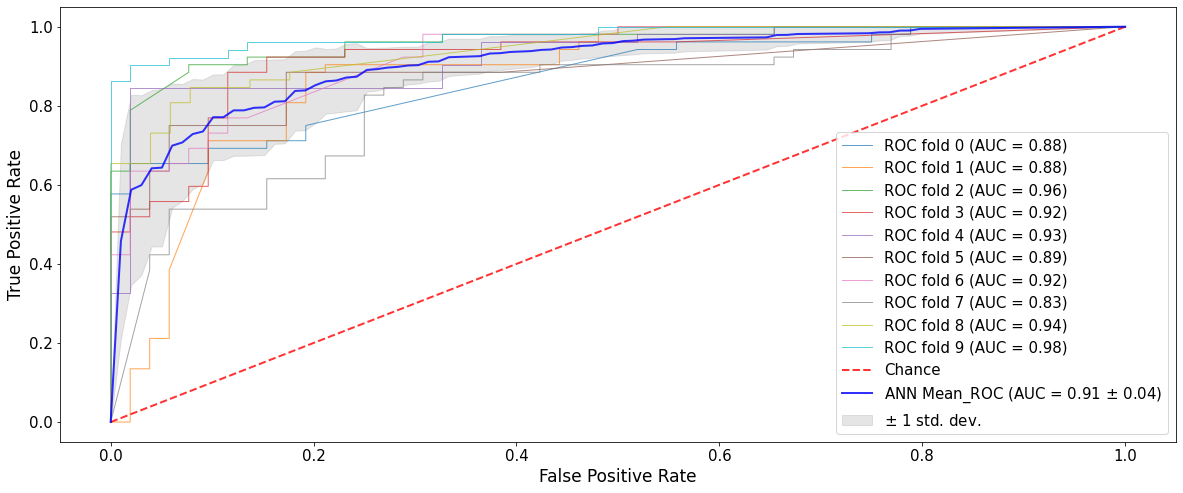

In [24]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras import models
from keras import layers
from keras import optimizers
from keras.wrappers import scikit_learn

cv = StratifiedKFold(n_splits=10)
plt.figure(figsize=(20,8))
tprs5 = []
aucs5 = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
X = X_resample_train
y = y_resample_train
for train, test in cv.split(X, y):
    model = Sequential()
    model.add(layers.Dense(30, activation=activation,input_shape=(36,)))
    model.add(layers.Dense(30, activation="relu"))
    model.add(layers.Dense(30, activation="relu"))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    # Fit the model
    model.fit(X_resample_train, y_resample_train,epochs=50)
    # evaluate the model
    probas_ = model.predict(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 0])
    tprs5.append(interp(mean_fpr, fpr, tpr))
    tprs5[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs5.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.7,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr5 = np.mean(tprs5, axis=0)
mean_tpr5[-1] = 1.0
mean_auc5 = auc(mean_fpr, mean_tpr5)
std_auc5 = np.std(aucs5)
plt.plot(mean_fpr, mean_tpr5, color='b',
         label=r'ANN Mean_ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc5, std_auc5),
         lw=2, alpha=.8)

std_tpr5 = np.std(tprs5, axis=0)
tprs5_upper = np.minimum(mean_tpr5 + std_tpr5, 1)
tprs5_lower = np.maximum(mean_tpr5 - std_tpr5, 0)
plt.fill_between(mean_fpr, tprs5_lower, tprs5_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.legend(loc="lower right", fontsize=15)
plt.savefig('ANN Mean_ROC.png',dpi=600,bbox_inches="tight")
plt.show()

# NB

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

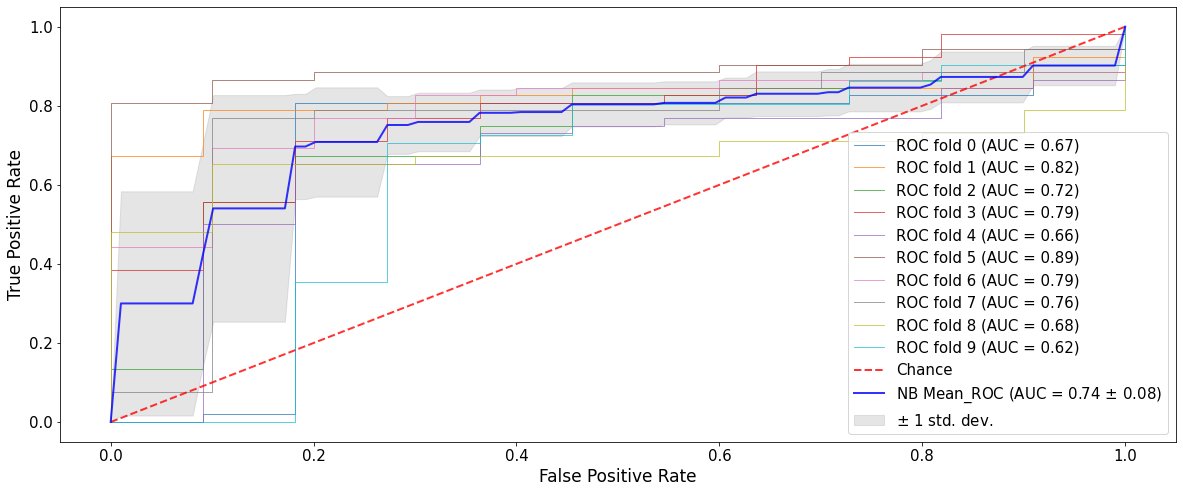

In [26]:
cv = StratifiedKFold(n_splits=10)
plt.figure(figsize=(20,8))

tprs6 = []
aucs6 = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
X = X_resample_train
y = y_resample_train
for train, test in cv.split(X, y):
    probas_ = nb.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs6.append(interp(mean_fpr, fpr, tpr))
    tprs6[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs6.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.7,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr6 = np.mean(tprs6, axis=0)
mean_tpr6[-1] = 1.0
mean_auc6 = auc(mean_fpr, mean_tpr6)
std_auc6 = np.std(aucs6) 
plt.plot(mean_fpr, mean_tpr6, color='b',
         label=r'NB Mean_ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc6, std_auc6),
         lw=2, alpha=.8)

std_tpr6 = np.std(tprs6, axis=0)
tprs6_upper = np.minimum(mean_tpr6 + std_tpr6, 1)
tprs6_lower = np.maximum(mean_tpr6 - std_tpr6, 0)
plt.fill_between(mean_fpr, tprs6_lower, tprs6_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.legend(loc="lower right", fontsize=15)
plt.savefig('NB Mean_ROC.png',dpi=600,bbox_inches="tight")
plt.show()

# models mean_roc

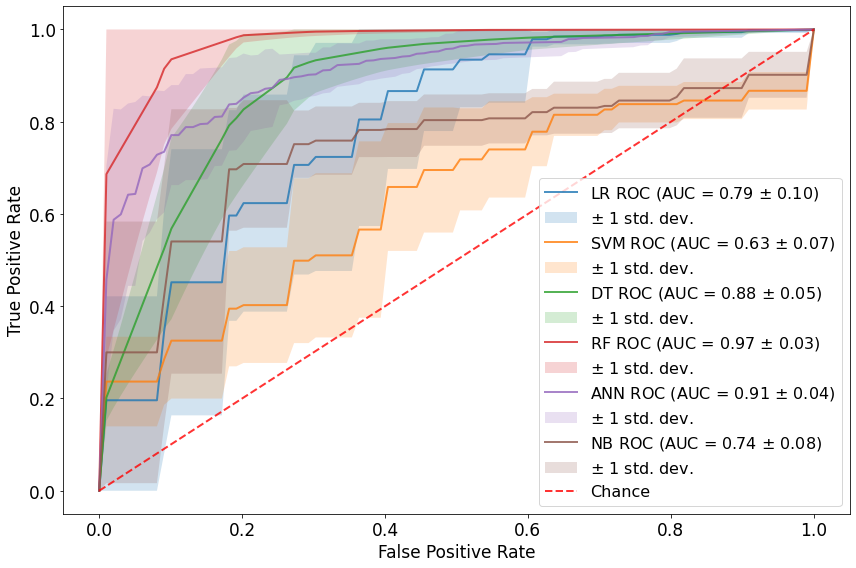

In [92]:
plt.figure(figsize=(12,8))
plt.plot(mean_fpr, mean_tpr7,
         label=r'LR ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc7, std_auc7),
         lw=2, alpha=.8)
plt.fill_between(mean_fpr, tprs7_lower, tprs7_upper, alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.plot(mean_fpr, mean_tpr2,
         label=r'SVM ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc2, std_auc2),
         lw=2, alpha=.8)
plt.fill_between(mean_fpr, tprs2_lower, tprs2_upper, alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.plot(mean_fpr, mean_tpr3,
         label=r'DT ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc3, std_auc3),
         lw=2, alpha=.8)
plt.fill_between(mean_fpr, tprs3_lower, tprs3_upper, alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.plot(mean_fpr, mean_tpr4,
         label=r'RF ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc4, std_auc4),
         lw=2, alpha=.8)
plt.fill_between(mean_fpr, tprs4_lower, tprs4_upper, alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.plot(mean_fpr, mean_tpr5,
         label=r'ANN ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc5, std_auc5),
         lw=2, alpha=.8)
plt.fill_between(mean_fpr, tprs5_lower, tprs5_upper, alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.plot(mean_fpr, mean_tpr6,
         label=r'NB ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc6, std_auc6),
         lw=2, alpha=.8)
plt.fill_between(mean_fpr, tprs6_lower, tprs6_upper, alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel('False Positive Rate', fontsize=17)
plt.ylabel('True Positive Rate', fontsize=17)
plt.legend(loc="lower right", fontsize=16)
plt.tight_layout()
plt.savefig('Models Mean_ROC0.png',dpi=600,bbox_inches="tight")
plt.show()